# Lista 2 (7 pkt.)

In [168]:
import string
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Zadanie 1. (1 pkt)

To zadanie należy wykonać ręcznie, bez używania komputera, korzystając z instrukcji z **one_time_pad.pdf**. Zaszyfruj wiadomość o treści: "NEW 15 HELICOPTERS.", za pomocą klucza: 68496 47757 10126 36660 25066. Do słów, które są w tabeli poniżej użyj odpowiednio ich kodów. Uwaga: w wiadomości jest liczba mnoga "helicopterS".

$\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
CODE&A&E&I&N&O&T&&\\
0&1&2&3&4&5&6&&&\\
\hline
B&C&D&F&G&H&J&K&L&M\\
70&71&72&73&74&75&76&77&78&79\\
\hline
P&Q&R&S&U&V&W&X&Y&Z\\
80&81&82&83&84&85&86&87&88&89\\
\hline
FIG&.&:&,/'&(/)&+&-&=&REG/?&SPC\\
90&91&92&93&94&95&96&97&98&99\\
\hline
\end{array}$

$\begin{array}{|cc|cc|cc|cc|}
\hline
000&ABORT&253&DECODE&505&MILITARY&758&STREET\\
\hline
019&ACCEPT&262&DELAY&514&MONEY&767&SUBWAY\\
\hline
028&ACCESS&271&DIFFICULT&523&MONTH&776&SUCCESS\\
\hline
037&ADDRESS&280&DOCUMENT&532&MORNING&785&SUPPLY\\
\hline
046&AFFIRMATIVE&299&ENCODE&541&MORSE&794&SUPPORT\\
\hline
055&AGENT&307&EVENING&550&NEGATIVE&802&TELEPHONE\\
\hline
064&AIRPLANE&316&EXECUTE&569&NIGHT&811&TODAY\\
\hline
073&AIRPORT&325&FACTORY&578&OBSERVATION&820&TOMORROW\\
\hline
082&ANSWER&334&FAILED&587&PASSPORT&839&TRAIN\\
\hline
091&AUTHORITY&343&FERRY&596&PERSON&848&TRANSFER\\
\hline
109&BETWEEN&352&FLIGHT&604&PHOTOGRAPH&857&TRANSMIT\\
\hline
118&BORDER&361&FREQUENCY&613&POSITIVE&866&TRAVEL\\
\hline
127&BUILDING&370&HARBOUR&622&POSSIBLE&875&TRUCK\\
\hline
136&CANCEL&389&HELICOPTER&631&POWER&884&UNABLE TO\\
\hline
145&CHANGE&398&HIGHWAY&640&PRIORITY&893&URGENT\\
\hline
154&CIVILIAN&406&IDENTITY&659&PROBLEM&901&VERIFY\\
\hline
163&COMPROMISE&415&IMMEDIATE&668&QUESTION&910&WEEK\\
\hline
172&COMPUTER&424&IMPOSSIBLE&677&RADIO&929&WITHIN\\
\hline
181&CONFIRM&433&INFORMATION&686&RECEIVE&938&YESTERDAY\\
\hline
190&CONTACT&442&INSTRUCTIONS&695&RENDEZVOUS&&\\
\hline
208&COORDINATE&451&LOCATE&703&REPEAT&&\\
\hline
217&COUNTRY&460&LOCATION&712&RESERVATION&&\\
\hline
226&COVERT&479&MAIL&721&ROUTINE&\\
\hline
235&CURRENT&488&MEETING&730&SATELLITE&\\
\hline
244&DANGER&497&MESSAGE&749&SHIP&\\
\hline
\end{array}$

## Zadanie 2 (1 pkt)

To zadanie również jest do zrobienia ręcznie. Używając klucza 11454 03055 15565 17466 26950 54906 odkoduj wiadomość 11454 00572 94578 25863 84286 24376. Wykorzystaj instrukcje z one_time_pad.pdf oraz tablicę kodów z Zadania 1.

## Zadanie 3. (1 pkt)

Wczytaj obrazki 'miki.png' oraz 'quest.png'.

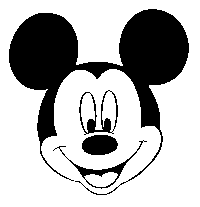

In [169]:
img1 = Image.open('miki.png').convert('L')
img1

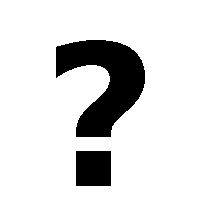

In [170]:
img2 = Image.open('quest.png').convert('L')
img2

Napisz funkcję **add_pic(img1, img2)**, która przyjmuje dwa obrazki i je dodaje piksel po pikselu za pomocą XOR, czyli **biały+biały=czarny, biały+czarny=biały, czarny+czarny=czarny**. Warto wykorzystać to, że **np.array(img)** zwraca tablicę, z wartościami 255 dla białych pikseli i 0 dla czarnych, aby zamienić tablicę z powrotem na obraz należy użyc **Image.fromarray()** przy czym tablica musi być typu **np.uint8** czyli tworząc tablicę podajemy typ: **np.array([1,2,3,4], dtype=np.uint8)**. Funkcja ma zwracać obrazek.

In [171]:
def add_pic(img1, img2):
    arr1 = np.array(img1, dtype='uint8')
    arr2 = np.array(img2, dtype='uint8')
    return Image.fromarray(np.bitwise_xor(arr1, arr2))

Wygeneruj (pseudo)losowy klucz, czyli obrazek z losowymi białymi i czarnymi pikselami, użyj **np.random**. Następnie zaszyfruj tym kluczem, za pomocą **add_pic**, oba obrazki **img1** i **img2**. Zauważ, że oba obrazki wyglądają na dobrze zaszyfrowane, zobacz jednak co się wydarzy kiedy dodasz do siebie te zaszyfrowane obrazki.

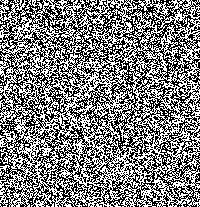

In [172]:
w, h = img1.size

key_array  = np.random.choice([0,255], size=(h,w)).astype(np.uint8)
key = Image.fromarray(key_array)

key

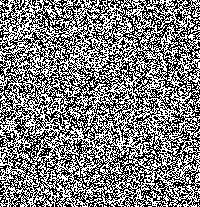

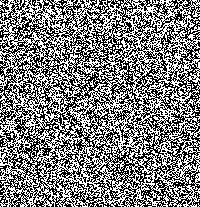

In [173]:
enc1 = add_pic(img1, key)
enc2 = add_pic(img2, key)
enc1.show()
enc2.show()

## Zadanie 4 (2 pkt.)

Zmienne ***msg1_enc*** oraz ***msg2_enc*** zawierają dwie zaszyfrowane wiadomości, w języku angielskim.

In [174]:
msg1_enc = '\x1e\x17\x0c\x12\x1b\x08\x0cf\x0e\x11x\x1a\x1c\x12o\x06\x18\x1f\x17\x03\x10\x01fkh\x1f\x08'
msg2_enc = '\x0b\ni\x07\x1c\x02k\x1f\x16e\x01\x0b\x07\x03\n\x15\x15\x0c\x1el\x07\x03\x03\x16\x01\x01\x02'

Wiadomo, że zostały zaszyfrowane tym samym kluczem, możemy to wykorzystać do odszyfrowania ich. W tym zadaniu konwencja zamiany liter na liczby i ich dodawania jest inna, niż w poprzednich. Znaki zamieniamy na liczby kodujące te znaki w **Unicode**, czyli za pomocą **ord()**, następnie dodajemy je do siebie za pomocą XOR na poziomie bitów, czyli za pomocą **^**. Napisz funkcję **add_str(msg1, msg2)**, które przyjmuje dwa teksty i zwraca tekst będący sumą tych tekstów zgodnie z powyższą konwencją.

In [175]:
def add_str(msg1, msg2):
    length = min(len(msg1), len(msg2))
    result = ''

    for i in range(length):
        xor_val = ord(msg1[i]) ^ ord(msg2[i])
        result += chr(xor_val)

    return result


Zauważmy, że jeżeli dwie wiadomości są zaszyfrowane tym samym kluczem to dodanie ich do siebie sprawia, że dostaniemy sumę wiadomości bez klucza. Poza tym zauważmy, że jeżeli znamy jakieś słowo występujące w którejś z wiadomości i je dodamy do sumy tych wiadomości w odpowiednim miejscu to w wyniku dostaniemy poprawne słowo z drugiej wiadomości. Zatem metoda łamania tych wiadomości jest następująca, zgadujemy jakie słowo może być w którejś z wiadomości, dodajemy je w różnych miejscach sumy wiadomości i patrzymy czy powstaje coś co może być fragmentem poprawnego tekstu, następnie na podstawie tego fragmentu zgadujemy większą pozostałą część słowa i teraz to słowo używamy do odczytania kolejnego fragmentu z pierwszej wiadomości.

Pierwsze słowo wybieramy z pośród najpopularniejszych słów w danym języku.

Najpopularniejsze angielskie słowa:
1. THE
2. BE
3. TO
4. OF
5. AND

Uwaga 1: Słowa zapisane są drukowanymi literami.

Uwaga 2: Słowa oddzialane są spacjami, zatem biorąc np. słowo THE należy sprawdzać ciąg znaków "&nbsp; THE &nbsp;", ze spacjami na początku i końcu, dzięki temu odszyfrujemy więcej znaków.

In [176]:
xor_sum = add_str(msg1_enc, msg2_enc)
print(xor_sum)


e
	oe}i



In [177]:

def check(guess):
    for i in range(len(xor_sum) - len(guess) + 1):
        fragment = add_str(xor_sum[i:i+len(guess)], guess)
        print(i, fragment)


In [178]:
check(" THE ")

0 5I-P'
1 =1]B*
2 EAOOG
3 5SB"Y
4 '^/<8
5 *31]T
6 G-P1Y
7 YL<<1
8 8 1T;
9 T-Y^1
10 YESTE
11 1OY 3
12 ;E-V-
13 11[H3
14 EGEV)
15 3Y[LO
16 -GA*7
17 3]'R"
18 );_GE
19 OCJ ]
20 7V-8I
21 "15,>
22 E)![*


In [179]:
check(" YESTERDAY ")

0 5D FSO5=Y-Y
1 =<PT^"+\5 1
2 ELBY3<J08H;
3 5^O4-]&=PB1
4 'S"*L1+UZHE
5 *><K <C_P<3
6 G ]'-TIU$J-
7 YA1*E^C!RT3
8 8-<BOT7WLJ)
9 T THE AIRPO
10 YH^B1V_WH67
11 1BT6GHAM.N"
12 ;H @YV[+V[E
13 1<V^GL=SC<]
14 EJH@]*EF$$I
15 3TVZ;RP!<0>
16 -JL<CG79(G*


In [180]:
check(" THE AIRPORT ")

0 5I-P'K.+H;+E;
1 =1]B*&0J$6CO1
2 EAOOG8Q&)^IEE
3 5SB"YY=+ATC13
4 '^/<850CK^7G-
5 *31]T8XIA*AY3
6 G-P1YPRC5\_G)
7 YL<<1ZX7CBA]O
8 8 1T;P,A]\[;7
9 T-Y^1$Z_CF=C"
10 YESTERDAY EVE
11 1OY 3LZ[?XP1]
12 ;E-V-R@=GM7)I
13 11[H3H&ER*/=>
14 EGEV).^P52;J*


In [181]:
check("Y YESTERDAY EVENING")

0 L=<PT^"+\5 1^G ]D]N
1 DELBY3<J08H;T3VCZG(
2 <5^O4-]&=PB1 EH]@!P
3 L'S"*L1+UZHEV[VG&YE
4 ^*><K <C_P<3HEL!^L"
5 SG ]'-TIU$J-V_*YK+:
6 >YA1*E^C!RT3L9RL,3.
7  8-<BOT7WLJ)*AG+4'Y
8 AT THE AIRPORT 3 PM


In [182]:
check(" AT THE AIRPORT 3 PM")

0 5\15SB"YY=+ATC13>3Y"
1 =$A'^/<850CK^7G- )?Z
2 ETS*31]T8XIA*AY3:OGO
3 5F^G-P1YPRC5\_G)\7R(
4 'K3YL<<1ZX7CBA]O$"50
5 *&-8 1T;P,A]\[;71E-$
6 G8LT-Y^1$Z_CF=C"V]9S
7 YY YESTERDAY EVENING


In [183]:
check(" BE ")

0 5_ 5
1 ='P'
2 EWB*
3 5EOG
4 'H"Y
5 *%<8
6 G;]T
7 YZ1Y
8 86<1
9 T;T;
10 YS^1
11 1YTE
12 ;S 3
13 1'V-
14 EQH3
15 3OV)
16 -QLO
17 3K*7
18 )-R"
19 OUGE
20 7@ ]
21 "'8I
22 E?,>
23 ]+[*


In [184]:
check(" TO ")

0 5I*5
1 =1Z'
2 EAH*
3 5SEG
4 '^(Y
5 *368
6 G-WT
7 YL;Y
8 8 61
9 T-^;
10 YET1
11 1O^E
12 ;E*3
13 11\-
14 EGB3
15 3Y\)
16 -GFO
17 3] 7
18 );X"
19 OCME
20 7V*]
21 "12I
22 E)&>
23 ]=Q*


In [185]:
check(" OF ")

0 5R#5
1 =*S'
2 EZA*
3 5HLG
4 'E!Y
5 *(?8
6 G6^T
7 YW2Y
8 8;?1
9 T6W;
10 Y^]1
11 1TWE
12 ;^#3
13 1*U-
14 E\K3
15 3BU)
16 -\OO
17 3F)7
18 ) Q"
19 OXDE
20 7M#]
21 "*;I
22 E2/>
23 ]&X*


In [186]:
check(" AND ")

0 5\+Q'
1 =$[C*
2 ETING
3 5FD#Y
4 'K)=8
5 *&7\T
6 G8V0Y
7 YY:=1
8 857U;
9 T8__1
10 YPUUE
11 1Z_!3
12 ;P+W-
13 1$]I3
14 ERCW)
15 3L]MO
16 -RG+7
17 3H!S"
18 ).YFE
19 OVL!]
20 7C+9I
21 "$3->
22 E<'Z*


In [187]:
check("MEETING AT THE AIRPORT 3 PM")

0 XX AND YY YESTERDAY EVENING


In [188]:
check("XX AND YY YESTERDAY EVENING")

0 MEETING AT THE AIRPORT 3 PM


## Zadanie 5 (2 pkt.)

W poprzednim zadaniu korzystaliśmu z faktu, że obie wiadomości były zaszyfrowane przy użyciu tego samego klucza. Jednka w praktyce nie wiemy, które i czy w ogóle, wiadomosci były zaszyfrowane przy użyciu tego samego klucza. Możemy to wykryć dokonując analizy statystycznej. Załóżmy, że dodajemy do siebie dwie wiadomości zaszyfrowane tymi samymi kluczami. Wtedy miejsca w których dostaniemy 0 (w konwencji użytej w tym zadaniu znak odpowiadający 0 w Unicode, czyli chr(0)) są miejscami w których w obu wiadomościach była ta sama litera. Jeżeli natomiast dodajemy wiadomości o różnych kluczach będziemy dostawać 0 w losowych miejscach. Zatem w pierwszym przypadku otrzymamy więcej 0.

Zatem należy wczytać wszystkie wiadomości msg1.txt, msg2.txt itd. a następnie dodać je do siebie parami, każda z każdą i policzyć odsetek 0 (tzn. znaków chr(0)) w otrzymanych sumach. Para wiadomości o wyższym niż inne odsetku będzie tą zaszyfrowaną przy u życiu tego samego klucza. Aby łatwiej zauważyć taką parę warto zilustrować sobie wyniki (odsetki 0) za pomocą **plt.imshow(X ,norm=LogNorm())** i użyć skali logarytmicznej, gdzie **X** to tablica 10 na 10 zawierająca odsetki 0 dla każdej pary wiadomości.

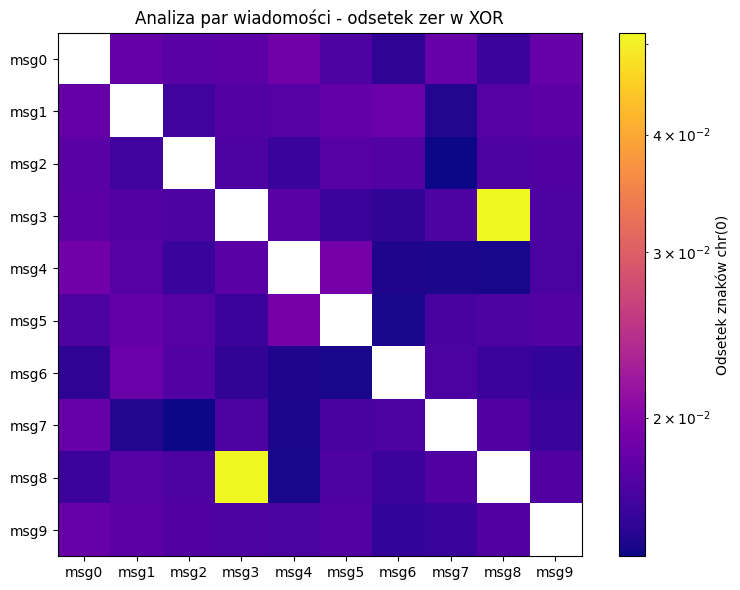

Para zaszyfrowana tym samym kluczem: msg3 i msg8
Odsetek zer: 0.0513


In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def add_str(msg1, msg2):
    length = min(len(msg1), len(msg2))
    result = ''
    for i in range(length):
        xor_val = ord(msg1[i]) ^ ord(msg2[i])
        result += chr(xor_val)
    return result

filenames = sorted([f"msg{i}.txt" for i in range(10)])
messages = {}
for fn in filenames:
    with open(fn, 'r', encoding='utf-8') as file:
        messages[fn] = file.read()

n = len(messages)
zero_counts = np.zeros((n, n))

for i, msg1 in enumerate(messages.keys()):
    for j, msg2 in enumerate(messages.keys()):
        if i >= j:
            continue
        xor_result = add_str(messages[msg1], messages[msg2])
        zero_count = xor_result.count(chr(0))
        total_chars = len(xor_result)
        zero_ratio = zero_count / total_chars if total_chars > 0 else 0
        zero_counts[i, j] = zero_ratio
        zero_counts[j, i] = zero_ratio

plt.figure(figsize=(8, 6))
plt.imshow(zero_counts, norm=LogNorm(), cmap='plasma')
plt.colorbar(label="Odsetek znaków chr(0)")
plt.xticks(range(n), [f"msg{i}" for i in range(n)])
plt.yticks(range(n), [f"msg{i}" for i in range(n)])
plt.title("Analiza par wiadomości - odsetek zer w XOR")
plt.tight_layout()
plt.show()

max_ratio = 0
best_pair = (0, 0)
for i in range(n):
    for j in range(i+1, n):
        if zero_counts[i, j] > max_ratio:
            max_ratio = zero_counts[i, j]
            best_pair = (i, j)

print(f"Para zaszyfrowana tym samym kluczem: msg{best_pair[0]} i msg{best_pair[1]}")
print(f"Odsetek zer: {max_ratio:.4f}")